## Junapudi_Jennifer(KG97855)

**Final Project: Stroke Prediction**

1. Introduction
   - Task/Business Understanding and Objective
   - Data Dictionary
2. Preparation
   - Packages
   - Data
   - Understanding Data
3. Exploratory Data Analysis
   - Univariate Analysis
   - Bivariate Analysis
4. Data Prepocessing
   - Conclusions from EDA
   - Making featuurs model ready
5. Modeling
   - Logistic Regression
   - Tree Models
6. Evaluation
   - Check Accuracy score
   - Confusion Matrix
   - Classification metrices
7. Conclusion
  

### Introduction

- Stroke, which accounts for around 11% of all fatalities globally, is the second greatest cause of mortality, according to the World Health Organization (WHO).
- The Strokes happens when the blood flow to a portion of the brain is interrupted or decreased, depriving the brain tissue of oxygen and nutrients.
- A stroke happens when the blood flow to the brain is interrupted or diminished, depriving brain tissue of oxygen and nutrients, which causes brain cells to start degenerating within minutes.
- Strokes are a medical emergency, thus receiving care quickly is essential. Early intervention can lessen problems and brain damage.
- Based on input criteria including gender, age, and numerous other factors, this data set is used to determine if a patient is likely to experience a stroke.



#### Task: To perform EDA and predict if a person is prone to a stoke or not.
- Recognize the factors that affect people and result in a stroke.
- Analyze how different stroke-preventing healthy and poor practices are related.
- Using the Regression Analysis (Logistic Regression) model to predict the likelihood of having a stroke and Evaluating the model's with accuracy score 





#### Data Dictionary

Attribute Information


1. ID: unique identifier 2) 
2. Gender: "Male", "Female" or "Other" 
3. Age: age of the patient 
4. Hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension 
5. Heart_Disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 
6. Ever_Married: "No" or "Yes" 
7. Work_Type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" 
8. Residence_Type: "Rural" or "Urban" 
9. Avg_Glucose_Level: average glucose level in blood 
10. BMI: body mass index 
11. Smoking_Status: "formerly smoked", "never smoked", "smokes" or "Unknown"
12. Stroke: 1 if the patient had a stroke or 0 if not 
- *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### Preparation

#### Packages

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from pandas_profiling import ProfileReport

# Scaling
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve



print('Packages imported...')

Packages imported...


#### Data

In [80]:
# Loading the dataset 
df = pd.read_csv("C:/Users/LENOVO/Documents/DATA_SCIENCE/DATA_601/datasets/Stroke/Stroke_Dataset.csv") # Read the dataset from csv file to  Pandas dataframe

#### Understanding Data

In [81]:
# The shape of the data
print("The shape of the dataset is : ", df.shape)


The shape of the dataset is :  (5110, 12)


In [82]:
# Preview of the first 5 rows of the data
df.head()


,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,67,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
1,77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
3,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
4,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0


In [83]:
df.describe()

,ID,Age,Hypertension,Heart_Disease,Avg_Glucose_Level,BMI,Stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [84]:
# Checking the number of unique values in each column
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()


,unique count
ID,5110
Gender,3
Age,104
Hypertension,2
Heart_Disease,2
Ever_Married,2
Work_Type,5
Residence_Type,2
Avg_Glucose_Level,3979
BMI,418


In [85]:
df.info() # information of the datatypes and the number of non-null values for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5110 non-null   int64  
 1   Gender             5110 non-null   object 
 2   Age                5110 non-null   float64
 3   Hypertension       5110 non-null   int64  
 4   Heart_Disease      5110 non-null   int64  
 5   Ever_Married       5110 non-null   object 
 6   Work_Type          5110 non-null   object 
 7   Residence_Type     5110 non-null   object 
 8   Avg_Glucose_Level  5110 non-null   float64
 9   BMI                4909 non-null   float64
 10  Smoking_Status     5110 non-null   object 
 11  Stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [86]:
display(df.Stroke.value_counts())
print("Stroke Percentage:", ((df['Stroke'].value_counts()/len(df))*100)
) 

0    4861
1     249
Name: Stroke, dtype: int64

Stroke Percentage: 0    95.127202
1     4.872798
Name: Stroke, dtype: float64


In [87]:
# To obtain the data type of each column
data_types = df.dtypes
print(data_types)


ID                     int64
Gender                object
Age                  float64
Hypertension           int64
Heart_Disease          int64
Ever_Married          object
Work_Type             object
Residence_Type        object
Avg_Glucose_Level    float64
BMI                  float64
Smoking_Status        object
Stroke                 int64
dtype: object


In [88]:
unique_values_count = df.apply(lambda x: x.nunique())

print(unique_values_count)

ID                   5110
Gender                  3
Age                   104
Hypertension            2
Heart_Disease           2
Ever_Married            2
Work_Type               5
Residence_Type          2
Avg_Glucose_Level    3979
BMI                   418
Smoking_Status          4
Stroke                  2
dtype: int64


##### Data Wrangling

In [89]:
age_ranges = [0, 45, 65, np.inf]  # Define the age ranges
labels = ['0-45', '46-65', 'above 65']  # Define the labels for each age range

df['Age_Group'] = pd.cut(df['Age'], bins=age_ranges, labels=labels, right=False)

In [90]:
# Separating the columns in categorical and continuous
cat_cols = ['Gender','Hypertension', 'Heart_Disease','Ever_Married','Work_Type','Residence_Type','Smoking_Status', 'Age_Group']
con_cols = ["ID", "Avg_Glucose_Level","BMI"]
target_col = ["Stroke"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)


The categorial cols are :  ['Gender', 'Hypertension', 'Heart_Disease', 'Ever_Married', 'Work_Type', 'Residence_Type', 'Smoking_Status', 'Age_Group']
The continuous cols are :  ['ID', 'Avg_Glucose_Level', 'BMI']
The target variable is :   ['Stroke']


In [91]:
# Summary statistics
df[con_cols].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ID,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
Avg_Glucose_Level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
BMI,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


In [92]:
# Missing values
df.isnull().sum()


ID                     0
Gender                 0
Age                    0
Hypertension           0
Heart_Disease          0
Ever_Married           0
Work_Type              0
Residence_Type         0
Avg_Glucose_Level      0
BMI                  201
Smoking_Status         0
Stroke                 0
Age_Group              0
dtype: int64

In [93]:
# replace outliers with the median of the column
df["BMI"] = df["BMI"].fillna(int(df['BMI'].median()))

# drop Columns
df.drop(['ID'], axis=1, inplace=True)



In [94]:
# Missing values
df.isnull().sum()


Gender               0
Age                  0
Hypertension         0
Heart_Disease        0
Ever_Married         0
Work_Type            0
Residence_Type       0
Avg_Glucose_Level    0
BMI                  0
Smoking_Status       0
Stroke               0
Age_Group            0
dtype: int64

### Pandas  Profiling 
- Overview: Provides general information about hte dataset, including no. of rows, columns, missing values, and duplicate rows
- Variables: Provides detailed information for each variable in the dataset, including datatype, distribution, missing values, correlation, and recommended data cleaning/preprocessing.
- Correlations: Provides a correlation matrix and a heatmap to visualize the pairwise correlations between variables.
- Missing Values: Provides a summary of missing values and a matrix to visualize the pattern of missing values in the dataset.
- Sample: Provide a random sample of the dataset.
- Overall, Pandas Profiling can help to streamline the exploratory data analysis process and provide useful insights and recommendations for further analysis.

In [95]:
profile = ProfileReport(df, 
                        title="Pandas Profiling Report",
                        html={'style':{'full_width':True}},minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [96]:
# group rows by Age_Group
grouped = df.groupby('Age_Group')
df

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke,Age_Group
0,Female,17.0,0,0,No,Private,Urban,92.97,28.0,formerly smoked,0,0-45
1,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0,0-45
2,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0,46-65
3,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0,0-45
4,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0,0-45
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0,46-65
5106,Female,19.0,0,0,No,Private,Urban,90.57,24.2,Unknown,0,0-45
5107,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,formerly smoked,0,46-65
5108,Female,53.0,1,0,Yes,Private,Urban,62.55,30.3,Unknown,1,46-65


### Exploratory Data Analysis

#### Univariate Analysis

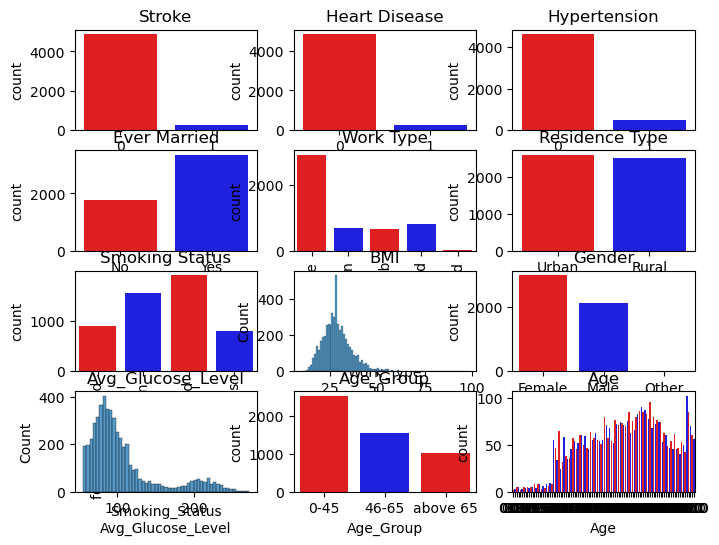

In [97]:

# Create a figure and subplots
fig, axs = plt.subplots(4, 3, figsize=(8, 6))

# Set the color palette
color_palette = ['#FF0000', '#0000FF']

sns.countplot(ax=axs[0, 0], data=df, x='Stroke', palette=color_palette)
axs[0, 0].set_title('Stroke')

sns.countplot(ax=axs[0, 1], data=df, x='Heart_Disease', palette=color_palette)
axs[0, 1].set_title('Heart Disease')

sns.countplot(ax=axs[0, 2], data=df, x='Hypertension', palette=color_palette)
axs[0, 2].set_title('Hypertension')

sns.countplot(ax=axs[1, 0], data=df, x='Ever_Married', palette=color_palette)
axs[1, 0].set_title('Ever Married')

sns.countplot(ax=axs[1, 1], data=df, x='Work_Type', palette=color_palette)
axs[1, 1].set_title('Work Type')
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(), rotation=90)


sns.countplot(ax=axs[1, 2], data=df, x='Residence_Type', palette=color_palette)
axs[1, 2].set_title('Residence Type')

sns.countplot(ax=axs[2, 0], data=df, x='Smoking_Status', palette=color_palette)
axs[2, 0].set_title('Smoking Status')
axs[2,0].set_xticklabels(axs[2,0].get_xticklabels(), rotation=90)


sns.histplot(ax=axs[2, 1], data=df, x='BMI', palette=color_palette)
axs[2, 1].set_title('BMI')

sns.countplot(ax=axs[2, 2], data=df, x='Gender', palette=color_palette)
axs[2, 2].set_title('Gender')

sns.histplot(ax=axs[3, 0], data=df, x='Avg_Glucose_Level', palette=color_palette)
axs[3, 0].set_title('Avg_Glucose_Level')

sns.countplot(ax=axs[3, 1], data=df, x='Age_Group', palette=color_palette)
axs[3, 1].set_title('Age_Group')

sns.countplot(ax=axs[3, 2], data=df, x='Age', palette=color_palette)
axs[3, 2].set_title('Age')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


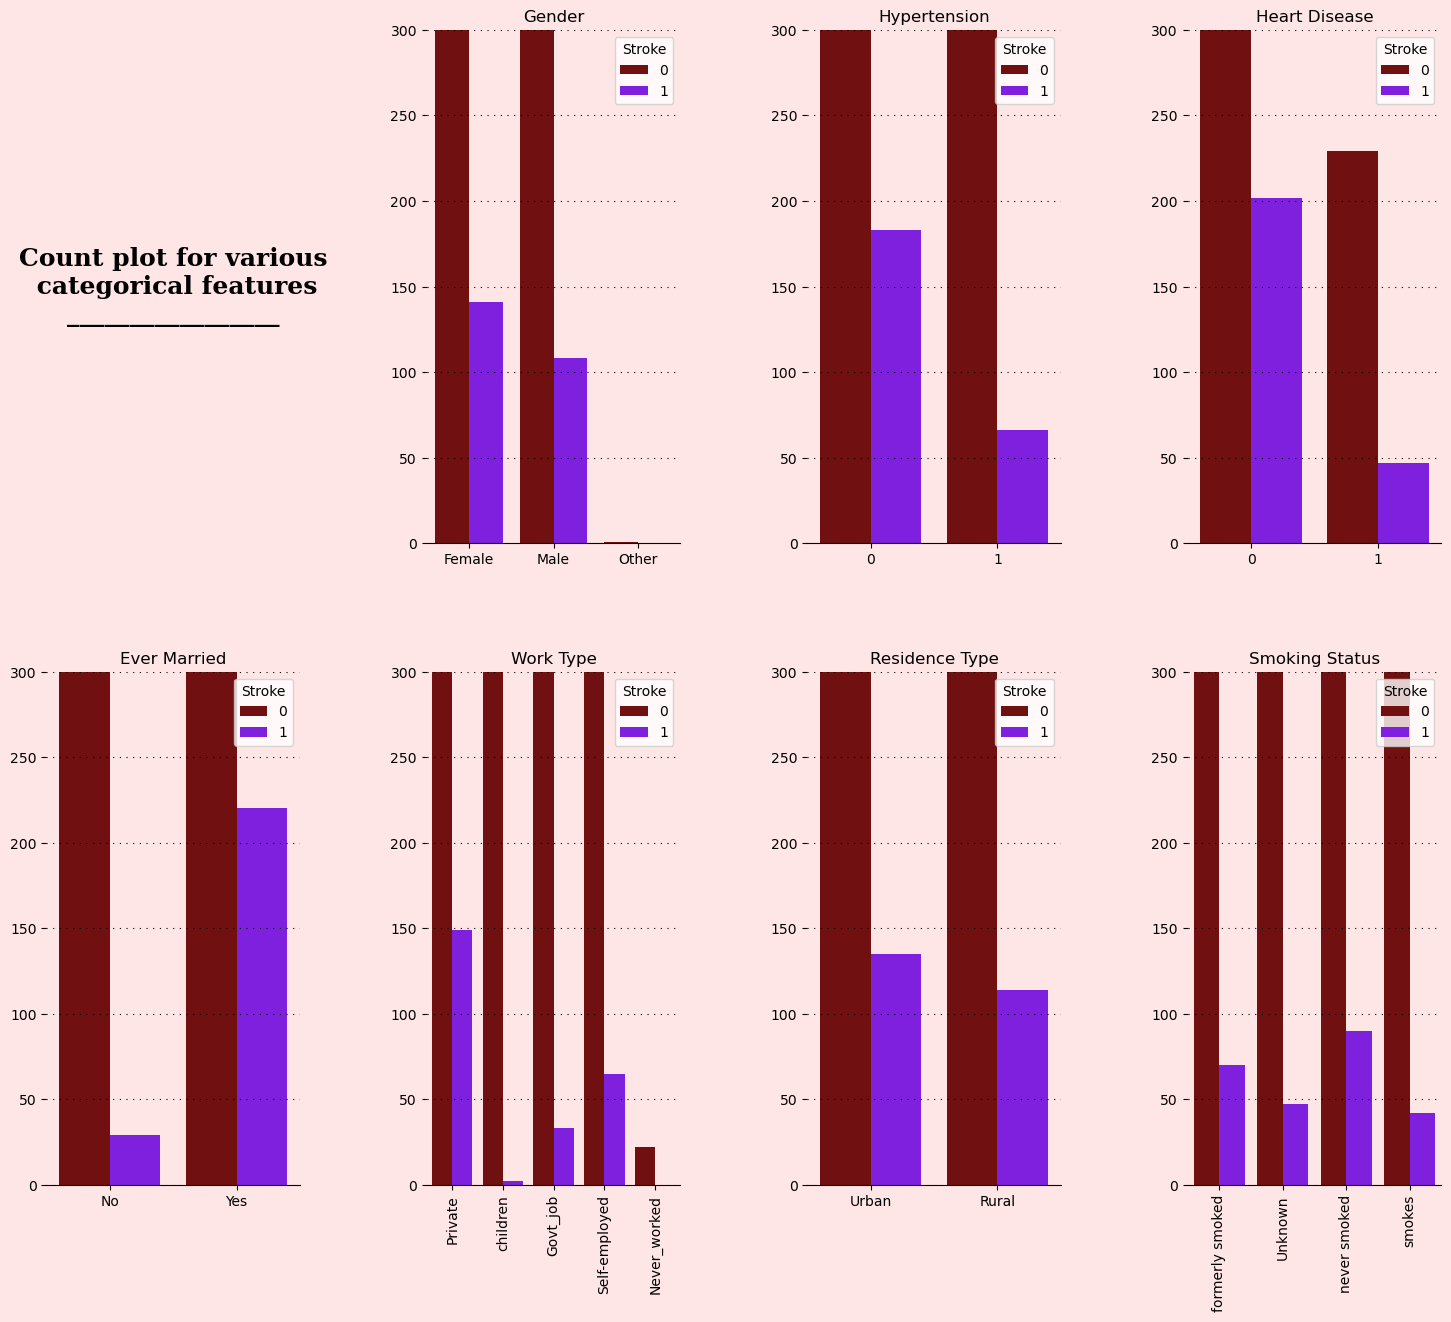

In [98]:
# Count plot of categorical features
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(2,4)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[0,3])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[1,3])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 




# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")



# Gender count
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,hue=df['Stroke'],x=df['Gender'],palette=color_palette)
ax1.set_ylim(0, 300) 
ax1.set_xlabel("")
ax1.set_ylabel("")


# Hypertension count
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,hue=df['Stroke'],x=df['Hypertension'],palette=color_palette)
ax2.set_ylim(0, 300) 
ax2.set_xlabel("")
ax2.set_ylabel("")


# Heart Disease count
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,hue=df['Stroke'],x=df['Heart_Disease'],palette=color_palette)
ax3.set_ylim(0, 300) 
ax3.set_xlabel("")
ax3.set_ylabel("")

# Ever Married  count
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,hue=df['Stroke'],x=df['Ever_Married'],palette=color_palette)
ax4.set_ylim(0, 300) 
ax4.set_xlabel("")
ax4.set_ylabel("")


# Work Type count
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,hue=df['Stroke'],x=df['Work_Type'],palette=color_palette)
ax5.set_ylim(0, 300) 
ax5.set_xlabel("")
ax5.set_ylabel("")


# Residence Type count
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,hue=df['Stroke'],x=df['Residence_Type'],palette=color_palette)
ax6.set_ylim(0, 300) 
ax6.set_xlabel("")
ax6.set_ylabel("")

# Smoking Status count
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,hue=df['Stroke'],x=df['Smoking_Status'],palette=color_palette)
ax7.set_ylim(0, 300) 
ax7.set_xlabel("")
ax7.set_ylabel("")

# Add titles to the subplots
ax1.set_title('Gender')
ax2.set_title('Hypertension')
ax3.set_title('Heart Disease')
ax4.set_title('Ever Married')
ax5.set_title('Work Type')
ax6.set_title('Residence Type')
ax7.set_title('Smoking Status')

# Adjust x-labels in subplots
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=90)
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=90)

# Adjust the spacing between subplots
fig.tight_layout()

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)

# Show the plot
plt.show()

    





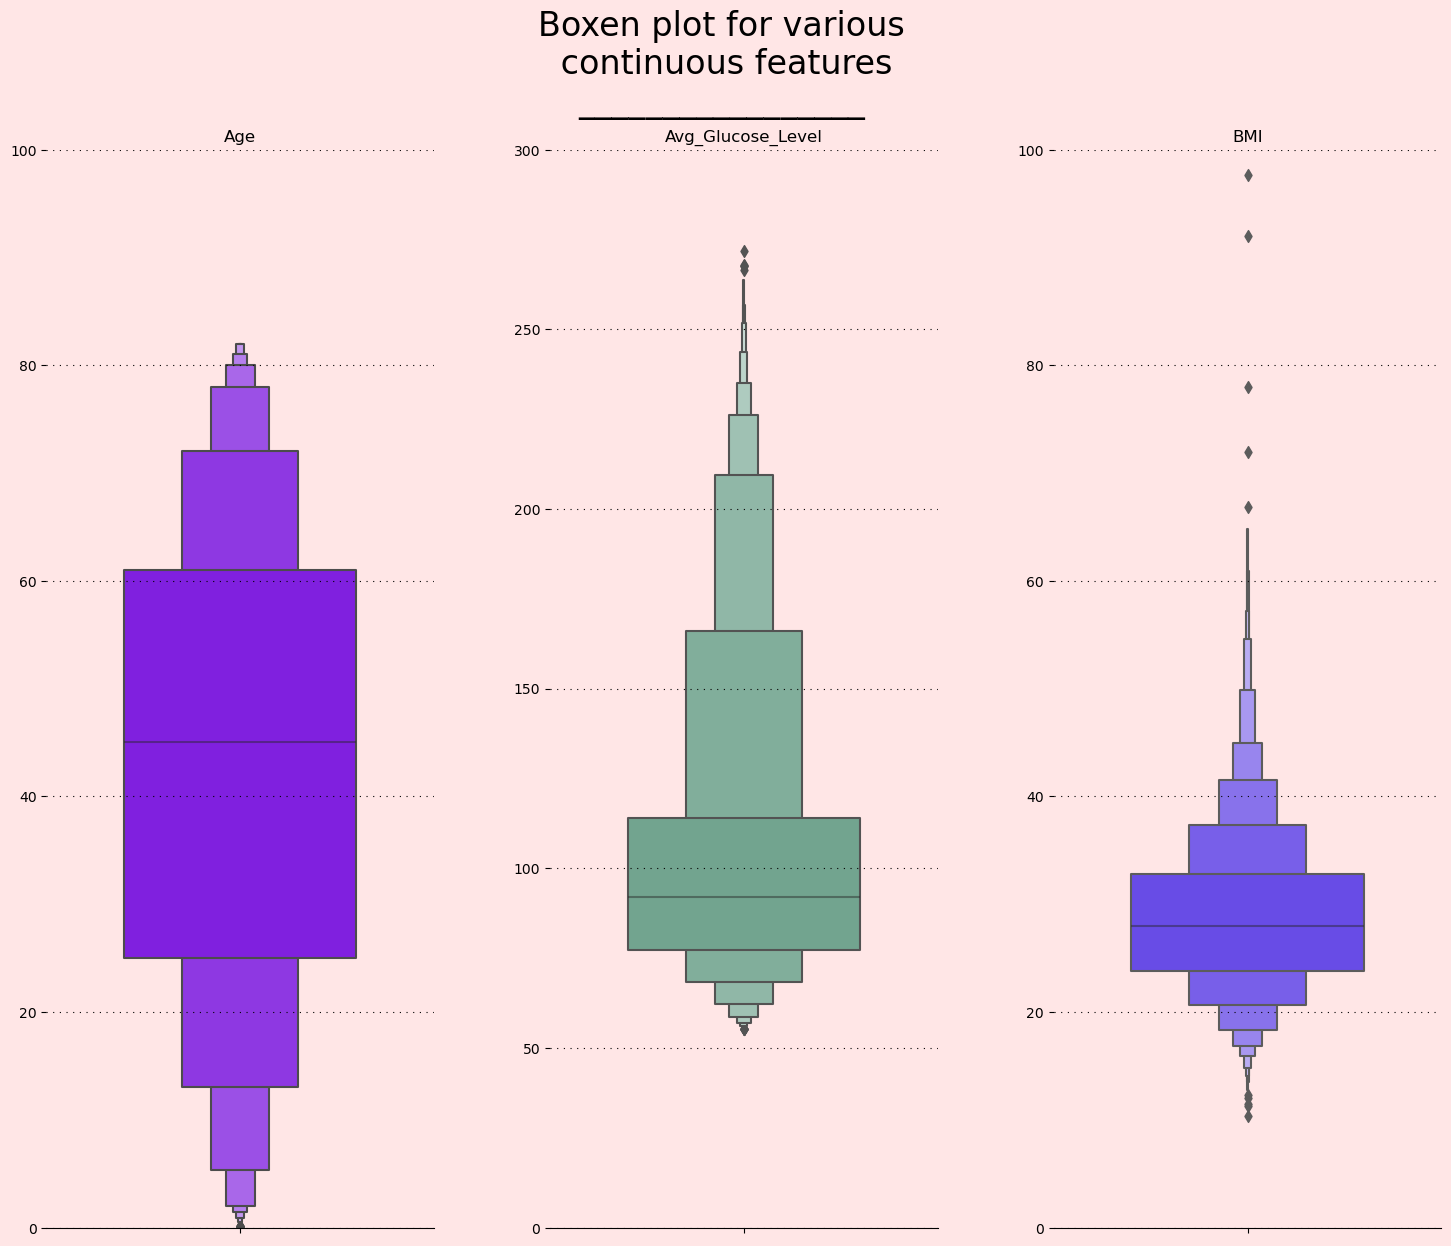

In [99]:
# Boxen plot of continuous features

fig = plt.figure(figsize=(18,14))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])




background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 


# Title of the plot

plt.suptitle('Boxen plot for various\n continuous features\n_________________', fontsize=24)



# Age
ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax0,y=df['Age'],palette=["#8000ff"],width=0.6)
ax0.set_xlabel("")
ax0.set_ylabel("")



# Average Glucose Level
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['Avg_Glucose_Level'],palette=["#6aac90"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")


# Body Mass Index (BMI)
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['BMI'],palette=["#5833ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

ax0.set_ylim(0, 100)
ax1.set_ylim(0, 300)
ax2.set_ylim(0, 100)


# Add titles to the subplots
ax0.set_title('Age')
ax1.set_title('Avg_Glucose_Level')
ax2.set_title('BMI')

# Adjust the spacing between subplots
fig.tight_layout()



for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    

# Show the plot
plt.show()






 

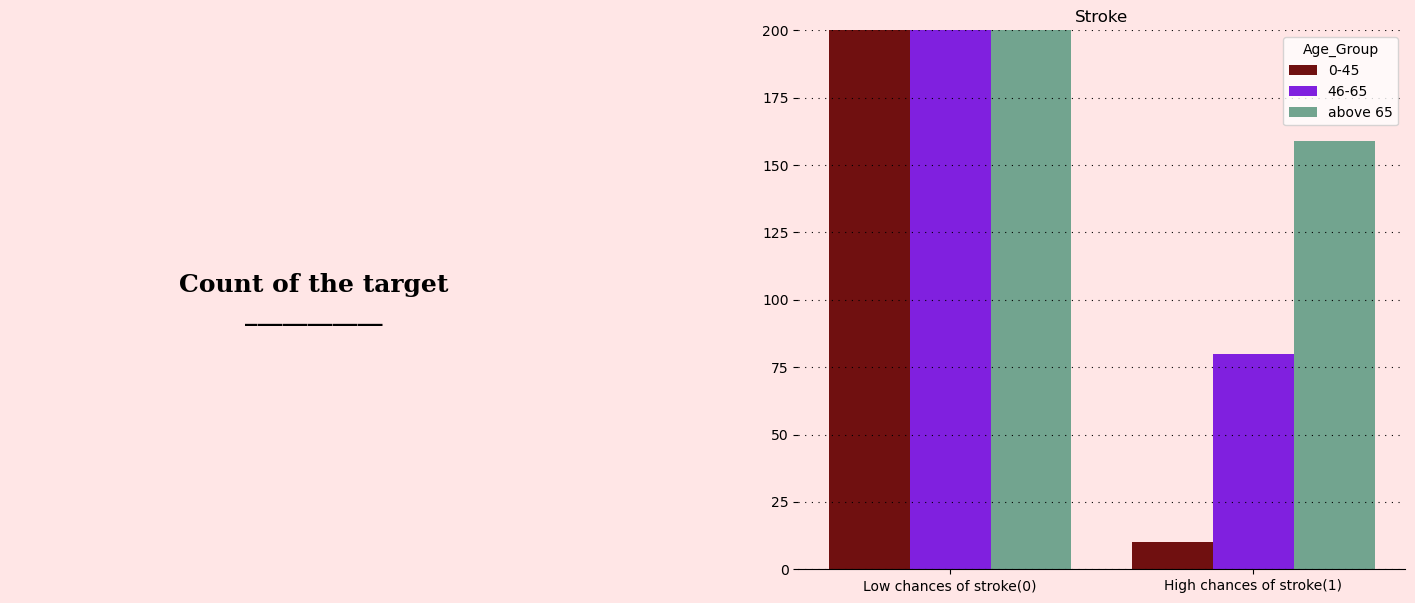

In [100]:
# Count plot of target

fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, hue=df['Age_Group'], x = df['Stroke'],palette = color_palette)
ax1.set_title('Stroke')
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of stroke(0)","High chances of stroke(1)"])
ax1.set_ylim(0, 200)


ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)





#### Bivariate Analysis 

In [101]:
# df for Encode.
df_encode = df

# Get the features of type object.
cat_encode = df_encode.select_dtypes(include='object').columns

# Remove Noisy Feature.
df_encode = df_encode.drop(df_encode.loc[df_encode['Gender']=='Other'].index)

# Object type Features are Coded.
df_encode = pd.get_dummies(df_encode, columns=cat_encode, prefix_sep='_', drop_first=True)
df_encode.head()


,Age,Hypertension,Heart_Disease,Avg_Glucose_Level,BMI,Stroke,Age_Group,Gender_Male,Ever_Married_Yes,Work_Type_Never_worked,Work_Type_Private,Work_Type_Self-employed,Work_Type_children,Residence_Type_Urban,Smoking_Status_formerly smoked,Smoking_Status_never smoked,Smoking_Status_smokes
0,17.0,0,0,92.97,28.0,0,0-45,0,0,0,1,0,0,1,1,0,0
1,13.0,0,0,85.81,18.6,0,0-45,0,0,0,0,0,1,0,0,0,0
2,55.0,0,0,89.17,31.5,0,46-65,1,1,0,1,0,0,1,0,1,0
3,42.0,0,0,98.53,18.5,0,0-45,0,0,0,1,0,0,1,0,1,0
4,31.0,0,0,108.89,52.3,0,0-45,0,0,0,1,0,0,1,0,0,0


In [102]:
# Encode Features of DataFrame without Label.
df_encode.drop(['Age_Group'], axis=1, inplace=True)

features_encode = df_encode.drop(['Stroke'], axis=1)

# Principal Component Analysis (PCA) is instantiated to transform the features to 2 main features.
pca = PCA(n_components=2)
df_pca = pca.fit_transform(features_encode)

# A DF is created with the result of the transformation.
df_pca = pd.DataFrame(df_pca, columns=['feature_1','feature_2'])

# A DF is created with the result of the transformation.
df_reduce = pd.concat([df_pca, df['Stroke']], axis=1)

# It is obtained that both the variance was preserved.
variance = ((pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])*100).round(2)
print(f"\nAfter PCA the variance for each feature was preserved in a: {variance}%\n")
print(df_reduce.head())


After PCA the variance for each feature was preserved in a: 97.96%

   feature_1  feature_2  Stroke
0 -17.069785  23.778609       0
1 -25.063931  27.636856       0
2 -14.862123 -14.503759       0
3  -8.043678   1.165279       0
4   1.595542   9.855306       0


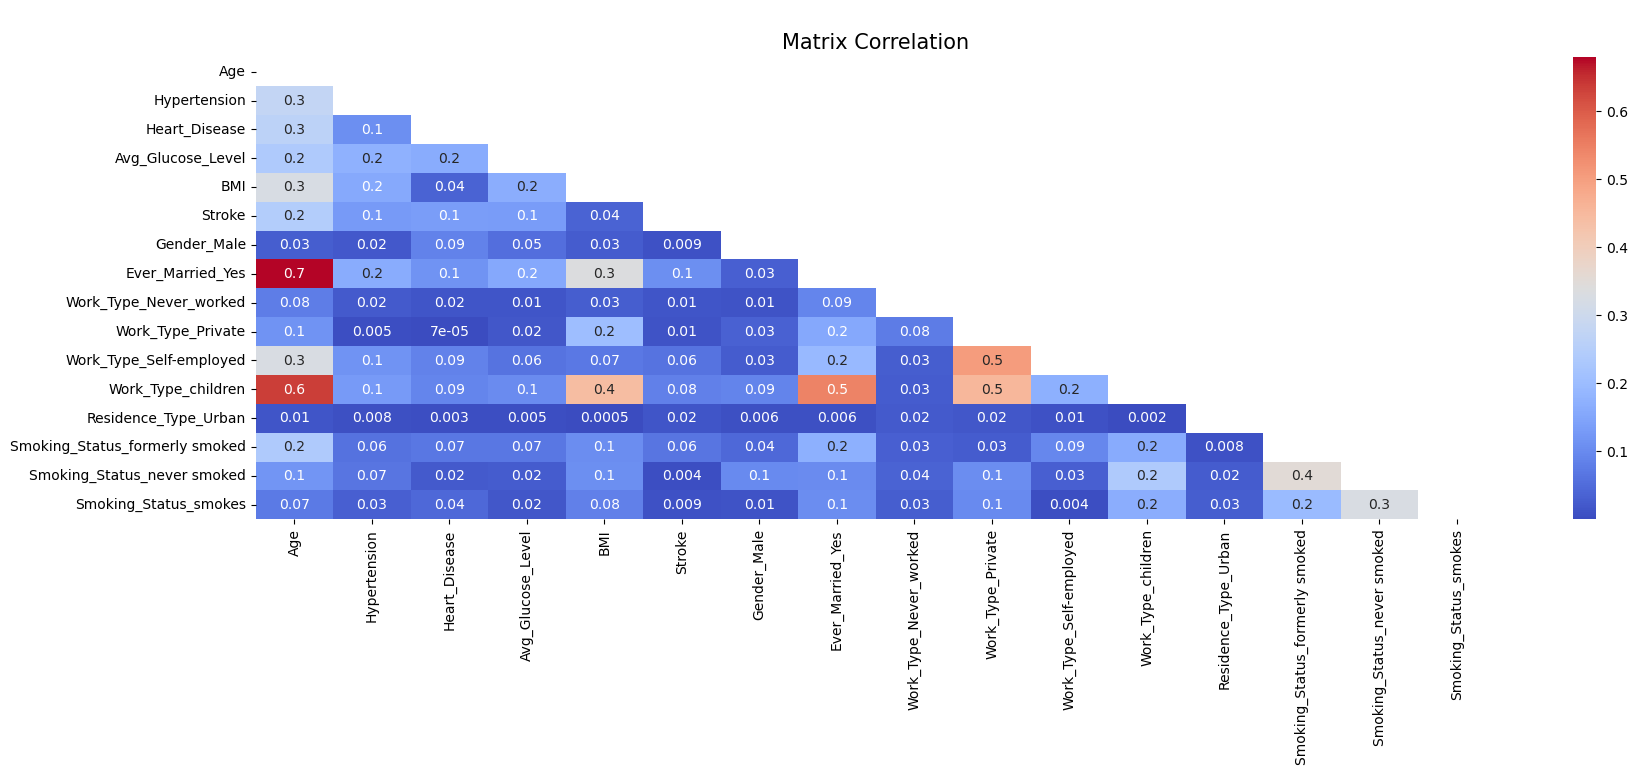

In [103]:
# df Matrix Correlation.
df_corr = abs(df_encode.corr())

# Matrix Plot.
palette_matrix = sns.color_palette("coolwarm", as_cmap=True)
plt.subplots(figsize=(20,6))
sns.heatmap(df_corr, annot=True, fmt='.1g', cmap=palette_matrix, cbar=True, mask=np.triu(df_corr))
plt.title('\nMatrix Correlation', fontsize=15)
plt.show()

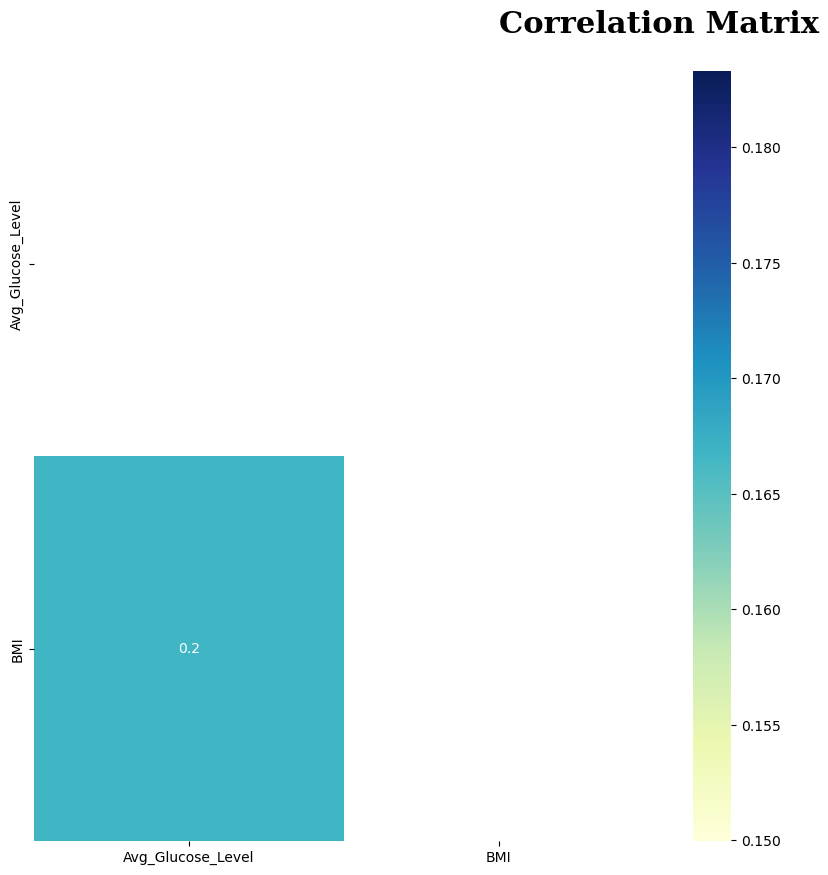

In [104]:
# Correlation matrix of continuous features

con_cols = ["Avg_Glucose_Level","BMI"]

df_corr = df[con_cols].corr().transpose()
df_corr

fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = df[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()




<Figure size 1200x1200 with 0 Axes>

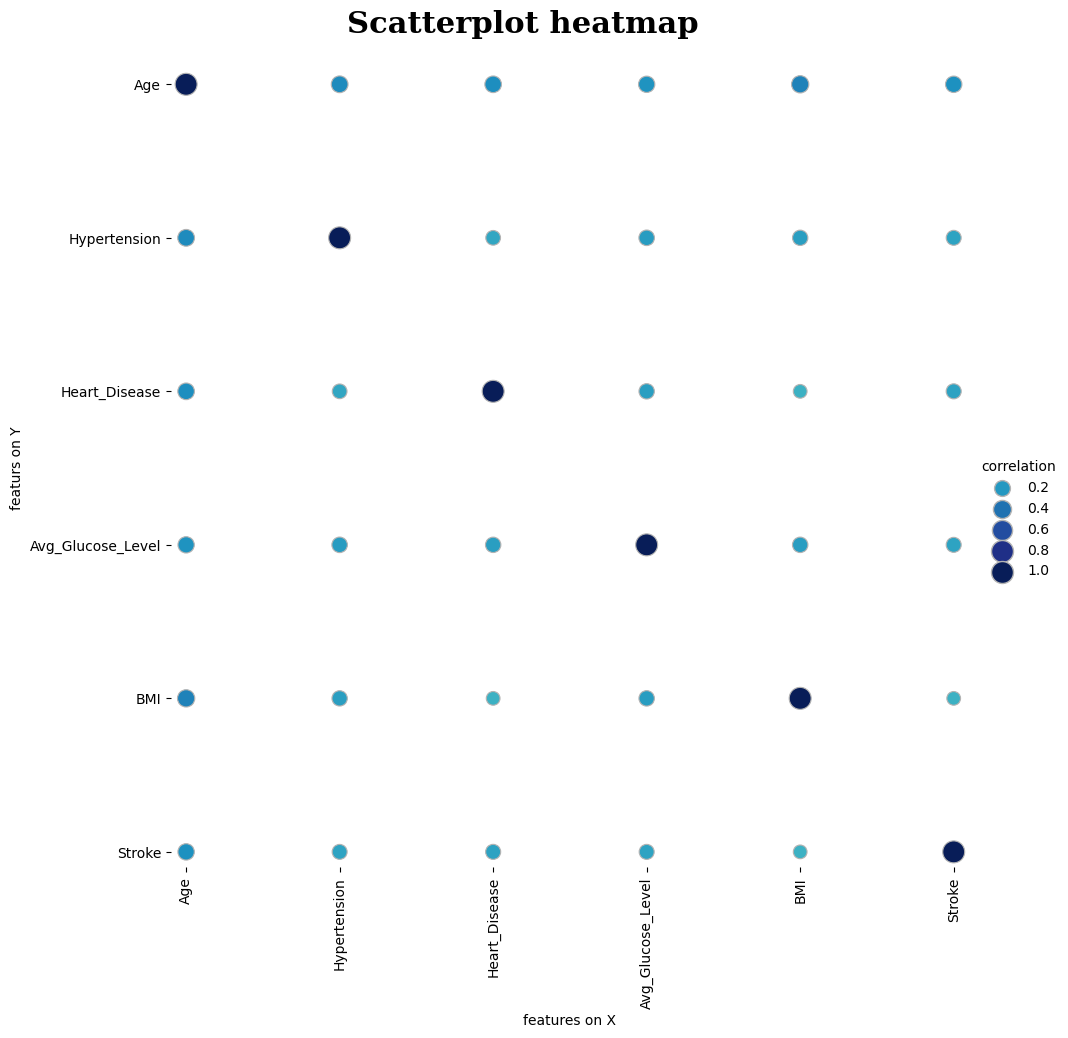

In [105]:
# Scatterplot heatmap of dataframe
fig = plt.figure(figsize=(12,12))
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()


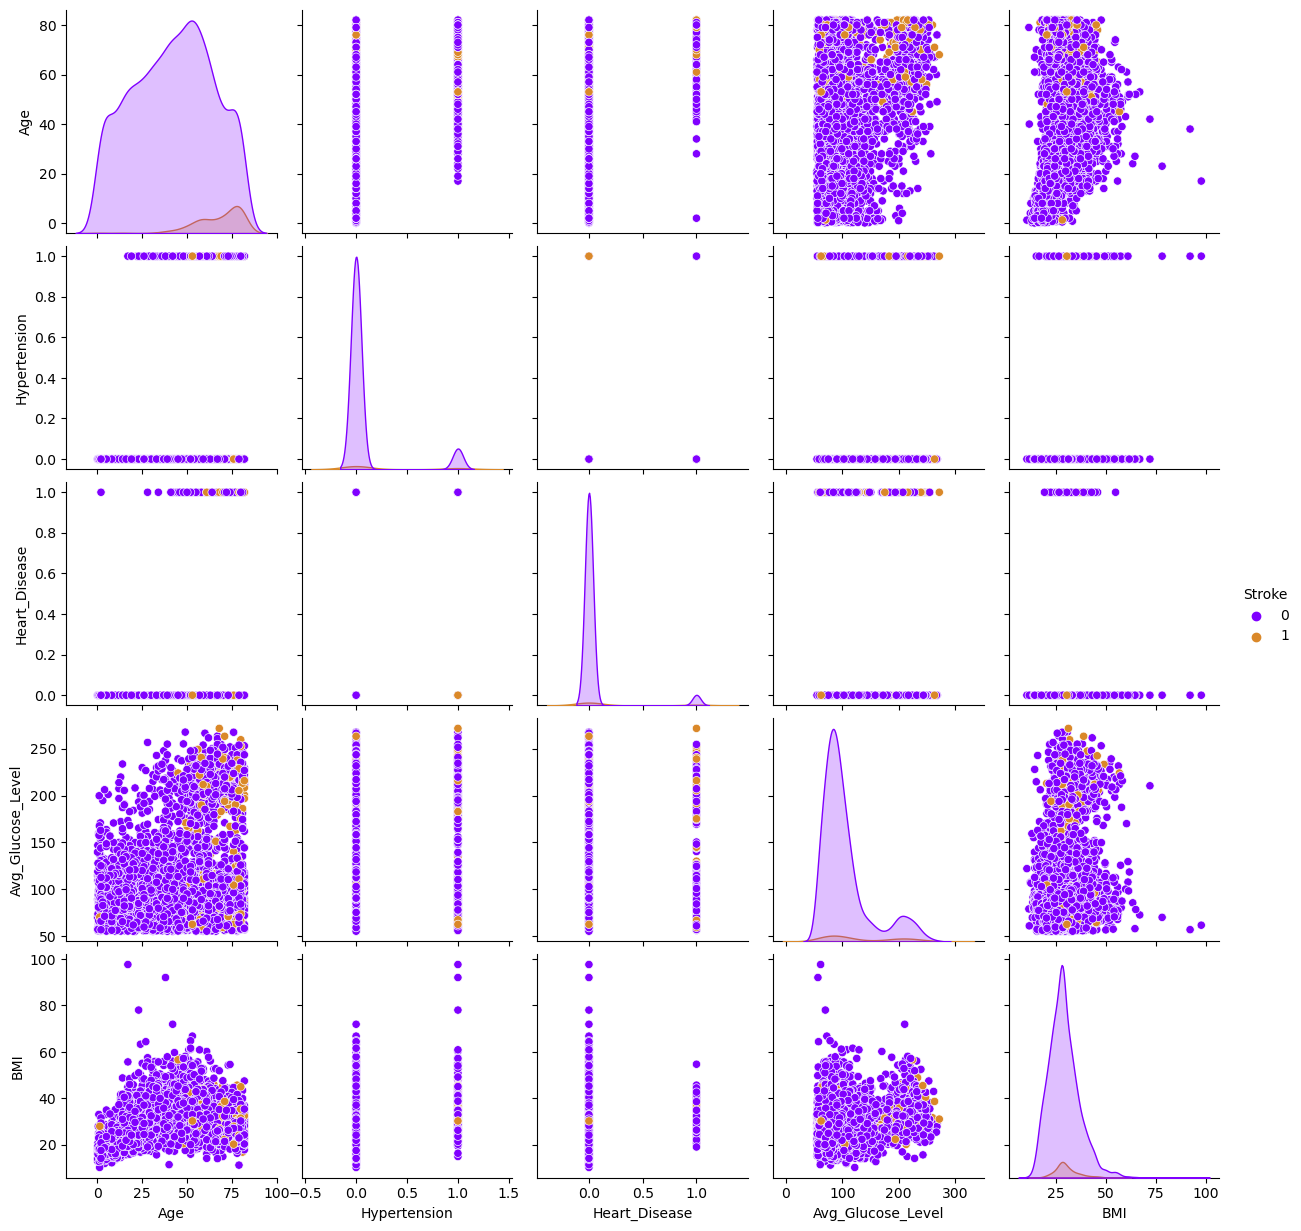

In [106]:
# Pairplot according to target variable - one plot to rule them all

sns.pairplot(df,hue='Stroke',palette = ["#8000ff","#da8829"])
plt.show()


#### Data Preprocessing

#### Conclusions from EDA
- The scales in the numerical characteristics are very different
- The dispersion of the data in the attributes 'age' and 'avg_glucose_level is high
- The column "BMI" has null values
- The 'Gender feature have the 'other' category which has only 0.02% of the data that is equal to only 1 patient.
- The 'Type Work' feature has the 'Never Worked' category which has only 0.44% of the data, which is equivalent to 22 patients. 
- A high level of imbalance is observed in the data, 95% of patients have not had a stroke and only 5% of patients in the enitre dataset have had a stroke.
- 'ID' feature is removed as it is unnecessary i.e does not contribute to the target variable
- The median of the BMI data is used to fill the NA values as the standard deviation in the data is high and also mean is not used, to prevent outliers from over-altering the data.
- There is a positive trend of patients who have had Stroke according to their age.9.7% patients older than 45 have suffered a Stroke, Patients over 65 are the population of age with more cases with 16.2%, 5.4% of patients between 46 and 65 years have had a stroke and only 0.5% of patients under 45 have had a Stroke.Implying that the elderly (over 45 years) is a higher risk factor for a Stroke and Patient over 65 should be more careful not to suffer a stroke.
- 5.2% of patients at an age between 46 and 65 have had a Stroke, patients over 65 have had 13.9% of stroke cases also theses are age groups with high BMI.We can conclude that age and BMI is a risk factor to have a stroke adn patients over 46 should improve their BMI since most of those who are at that age have a stroke have high BMI.
- 20.3% of patients with Hypertension and Heart Dissease have had Stroke and 3.4% without revealing that both the conditions increase the probability of Stroke.
- 11.3% of patients with high glucose level and 3.6% of patients with normal gulcose levels had stroke. Hence Patients with high glucose levl have 3 times more likely to have stroke. 
- Of people living  in urban areas 5.2% have had stroke whereas 1.2% in rural areas.
- 6% married men and 7.4% married women have had stroke.
- 'Hypertension' and Heart Diseasse' are very unbalanced, 'Gender' and 'Work type' have categories with less than 0% of the data.35% of the patients smoking status is 'unknown'
- 'Age' has gaussian distribution and 'Avg_Glucose_Level' and 'BMI' have right-skewed distribution. All teh attribues have outliers with 'BMI' mostly marked.
- There is only one high correlation greater than 0.7 in the crossing of the features 'Age' with 'Married' and 12 crosses between the features with moderate correlations (in range of 0.3 to 0.6) and the rest are of low correlations (less than 0.3)
- 'Age' is the feature that has the highest correlation with the target('Stroke') with a low correlation of 0.2 and Smoking status never smoked has the least correlation with 0.004 of correlation.

##### Making features model ready 


##### Scaling and Encoding features


In [116]:
# creating a copy of df
df1 = df
df1.drop(['Age_Group'], axis=1, inplace=True)


# define the columns to be encoded and scaled
cat_cols = ['Gender','Hypertension', 'Heart_Disease','Ever_Married','Work_Type','Residence_Type','Smoking_Status']
con_cols = ["Age","Avg_Glucose_Level","BMI"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['Stroke'],axis=1)
y = df1[['Stroke']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()





The first 5 rows of X are


,Age,Avg_Glucose_Level,BMI,Gender_Male,Gender_Other,Hypertension_1,Heart_Disease_1,Ever_Married_Yes,Work_Type_Never_worked,Work_Type_Private,Work_Type_Self-employed,Work_Type_children,Residence_Type_Urban,Smoking_Status_formerly smoked,Smoking_Status_never smoked,Smoking_Status_smokes
0,-0.777778,0.029448,0.000000,0,0,0,0,0,0,1,0,0,1,1,0,0
1,-0.888889,-0.164880,-1.044444,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.277778,-0.073687,0.388889,1,0,0,0,1,0,1,0,0,1,0,1,0
3,-0.083333,0.180350,-1.055556,0,0,0,0,0,0,1,0,0,1,0,1,0
4,-0.388889,0.461528,2.700000,0,0,0,0,0,0,1,0,0,1,0,0,0


In [117]:
# Train and test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)


The shape of X_train is       (4088, 16)
The shape of X_test is        (1022, 16)
The shape of y_train is       (4088, 1)
The shape of y_test is        (1022, 1)


### Modeling 


In [118]:
#### Logistic Regression
# instantiating the model
logreg = LogisticRegression()

# fitting the model
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))


The test accuracy score of Logistric Regression is  0.9500978473581213


#### Tree Models

##### Decision Tree

In [131]:
# instantiating the classifier
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.9070450097847358


##### Random Forest

In [132]:


# instantiating the classifier
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.9070450097847358


##### Gradient Boosting Classifier - without tuning

In [133]:
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Gradient Boosting Classifier is  0.9481409001956947


##### ROC Curve

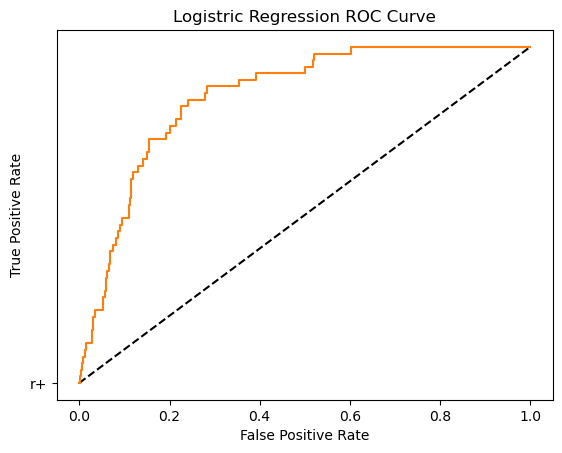

In [134]:
# calculating the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

In [135]:
# Check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))



Model accuracy score: 0.9481


In [136]:
y_pred_train = logreg.predict(X_train)

y_pred_train

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9518


In [137]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9518
Test set score: 0.9501


The training-set accuracy score is 0.9518 while the test-set accuracy to be 0.9501. These two values are quite comparable. 


##### Confusion Matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-
True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [138]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[969   2]
 [ 51   0]]

True Positives(TP) =  969

True Negatives(TN) =  0

False Positives(FP) =  2

False Negatives(FN) =  51


<AxesSubplot:>

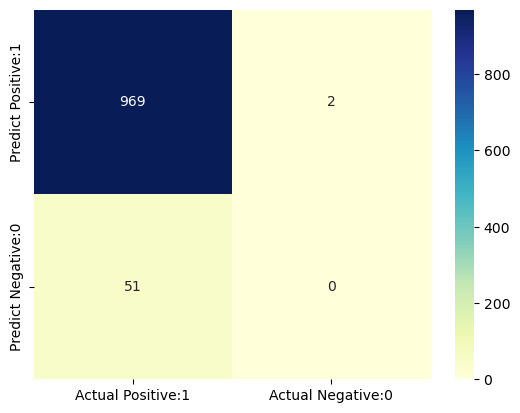

In [139]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

**Classification Report**

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-


In [140]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       971
           1       0.00      0.00      0.00        51

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



In [141]:
# Classification Accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [142]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9481


In [143]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0519



Precision

Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).


In [144]:
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9979



Recall

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).


In [145]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9500


### Conclusion


- The logistic regression model accuracy score is 0.9501. So, the model does a very good job in predicting the chances of stroke.

- The model shows no signs of overfitting.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.


- For the stroke 0, the precision is 0.95, indicating that 95% of the instances predicted as class 0 were correct. However, for the stroke 1, the precision is 0.00, meaning that none of the instances predicted as class 1 were correct.

- For the class 0, the recall is 1.00, indicating that all instances of class 0 were correctly identified. However, for the class 1, the recall is 0.00, meaning that none of the instances of class 1 were correctly identified.

-  For class 0, the F1-score is 0.97, which is high due to the high precision and recall values. For class 1, the F1-score is 0.00, reflecting the poor performance of the model in correctly identifying instances of class 1.

- Support represents the number of instances of each class in the test set. In this case, there are 971 instances of class 0 and 51 instances of class 1.

- The overall accuracy of the model on the test set is 0.95, indicating that it correctly predicted the class for 95% of the instances.

- The macro average calculates the average of the precision, recall, and F1-score for each class without considering class imbalance. In this case, the macro average precision, recall, and F1-score are 0.48, 0.50, and 0.49, respectively.

- The weighted average calculates the average of the precision, recall, and F1-score for each class, taking into account the support (number of instances) for each class. The weighted average precision, recall, and F1-score are 0.90, 0.95, and 0.93, respectively.

- Decision Tree Model correctly predicted the stroke of approximately 90.70% of the instances in the test set.

- Random Forest model achieved the same accuracy as the Decision Tree model on the test set.

- Gradient Boosting Classifier model correctly predicted the stroke of approximately 94.81% of the instances in the test set, which is higher than the accuracy scores of the Decision Tree and Random Forest models.


- Based on these metrics, the model performs well for stroke 0, achieving high precision, recall, and F1-score. However, it fails to correctly predict any instances of stroke 1, resulting in poor performance for that stroke value.This can be attributed to lack of adequate data for the Stroke 1 instances.